In [222]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## ------------------- Data Load
file_path = '/Users/baekchaeyoon/Desktop/LAproject/Homework/items.csv'
df = pd.read_csv(file_path)

df

,Item Name,Sale Price,Discount,Free Shipping,Total reviews
0,"Medical Emergency Contact Bracelet, Custom Med...",15.99,No discount,X,1.9k
1,14K Solid Gold Diamond Slave Bracelet / Solid ...,200.40,(25% off),O,5.9k
2,"Love Knot Custom Bracelet Set, Infinite Robe K...",25.00,(50% off),O,842
3,Initial Bracelet - Letter Bracelet - Couples B...,20.92,(25% off),O,3.2k
4,"Gold Mama Mini Bracelet Set, Gold Mom Daughter...",11.00,No discount,X,3.9k
...,...,...,...,...,...
3171,"Gold Mama Mini Bracelet Set, Gold Mom Daughter...",11.00,No discount,X,3.9k
3172,Initial Bracelet - Letter Bracelet - Couples B...,20.92,(25% off),O,3.2k
3173,custom birthstone 14k gold bracelets | birthst...,14.00,No discount,X,3.5k
3174,Personalized Word Bracelet - Pink Custom Beade...,10.95,No discount,X,2k


In [223]:
## ------------------- Data Preprocessing

df = df[df['Total reviews'].str.contains('^\d+(\.\d+)?k$', na=False, regex=True)]

# Function to convert 'k' values to numeric
def convert_k(value):
    if 'k' in str(value):
        return float(value.replace('k', '')) * 1000
    else:
        return pd.to_numeric(value, errors='coerce')

# Apply the conversion function to the 'Total reviews' column
df['Total reviews'] = df['Total reviews'].apply(convert_k)

# Drop rows with NaN in 'Total reviews'
df.dropna(subset=['Total reviews'], inplace=True)

# Save data to new CSV file
output_file_path = '/Users/baekchaeyoon/Desktop/LAproject/Homework/updated_items.csv'
df.to_csv(output_file_path, index=False)

df

,Item Name,Sale Price,Discount,Free Shipping,Total reviews
0,"Medical Emergency Contact Bracelet, Custom Med...",15.99,No discount,X,1900.0
1,14K Solid Gold Diamond Slave Bracelet / Solid ...,200.40,(25% off),O,5900.0
3,Initial Bracelet - Letter Bracelet - Couples B...,20.92,(25% off),O,3200.0
4,"Gold Mama Mini Bracelet Set, Gold Mom Daughter...",11.00,No discount,X,3900.0
5,Personalized Word Bracelet - Pink Custom Beade...,10.95,No discount,X,2000.0
...,...,...,...,...,...
3171,"Gold Mama Mini Bracelet Set, Gold Mom Daughter...",11.00,No discount,X,3900.0
3172,Initial Bracelet - Letter Bracelet - Couples B...,20.92,(25% off),O,3200.0
3173,custom birthstone 14k gold bracelets | birthst...,14.00,No discount,X,3500.0
3174,Personalized Word Bracelet - Pink Custom Beade...,10.95,No discount,X,2000.0


Average number of product reviews:  9070.41910331384
Median number of product reviews:  3500.0


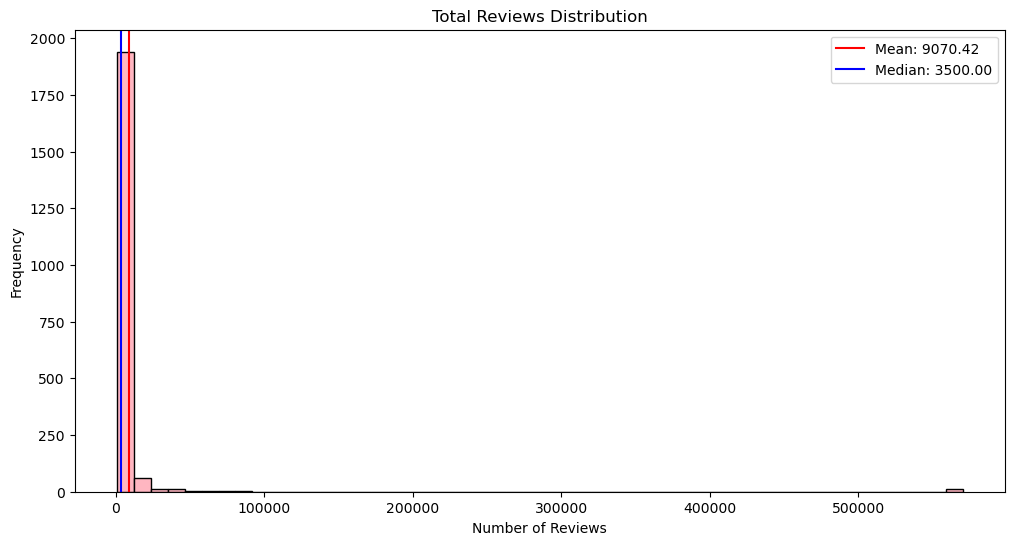

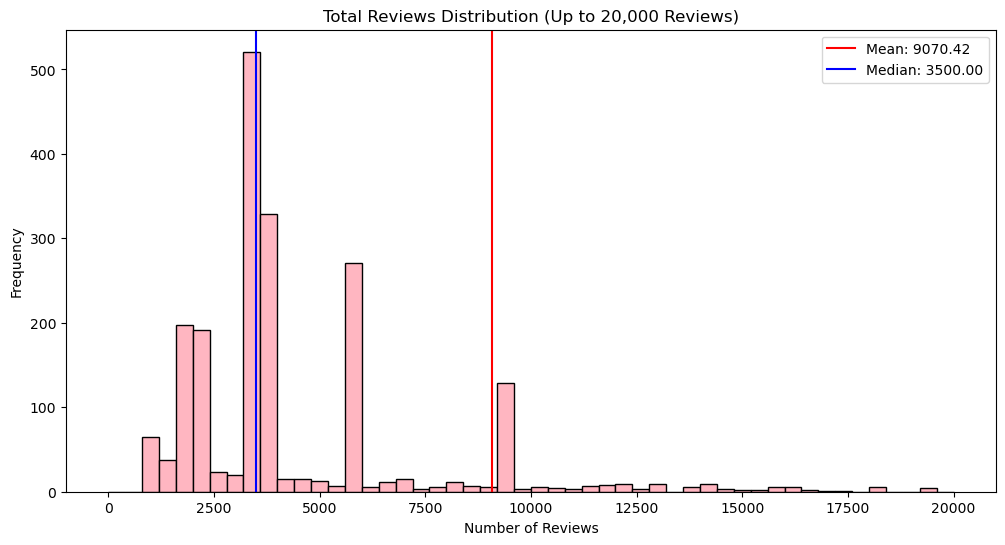

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns


## ------------------- Review Analysis
mean_value = df['Total reviews'].mean()
median_value = df['Total reviews'].median()

print('Average number of product reviews: ', mean_value)
print('Median number of product reviews: ', median_value)

## ------------------- Review Visualization
plt.figure(figsize=(12, 6))
plt.hist(df['Total reviews'], bins=50, color='lightpink', edgecolor='black')
plt.title('Total Reviews Distribution')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.axvline(mean_value, color='r', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='b', label=f'Median: {median_value:.2f}')
plt.legend()
plt.show()

## ------------------ Total Reviews Distribution (Up to 20,000 Reviews)
plt.figure(figsize=(12, 6))
plt.hist(df['Total reviews'], bins=50, range=(0, 20000),color='lightpink', edgecolor='black')
plt.title('Total Reviews Distribution (Up to 20,000 Reviews)')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.axvline(mean_value, color='r', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='b', label=f'Median: {median_value:.2f}')
plt.legend()
plt.show()


Average number of product Sale Price:  42.58757560975578
Median number of product Sale Price:  18.97


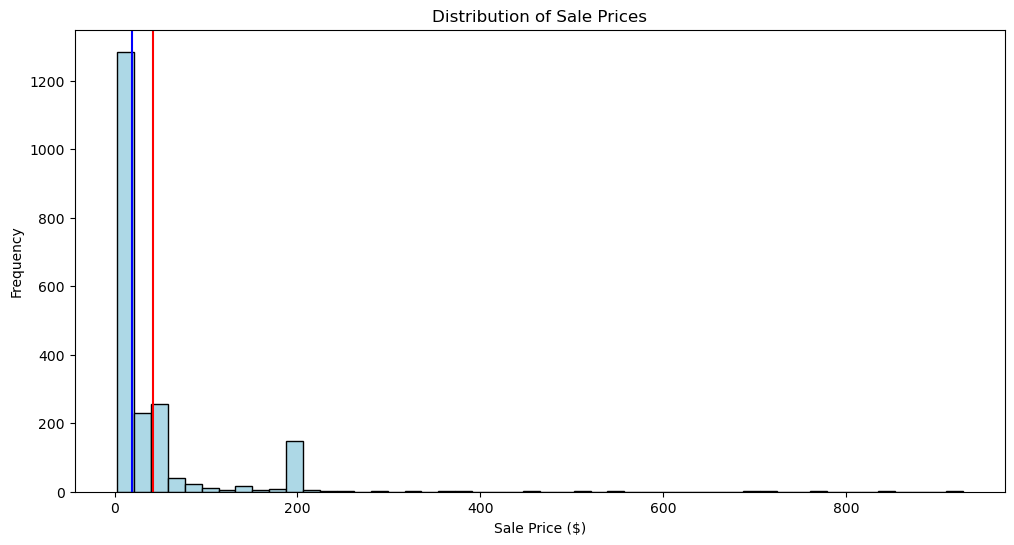

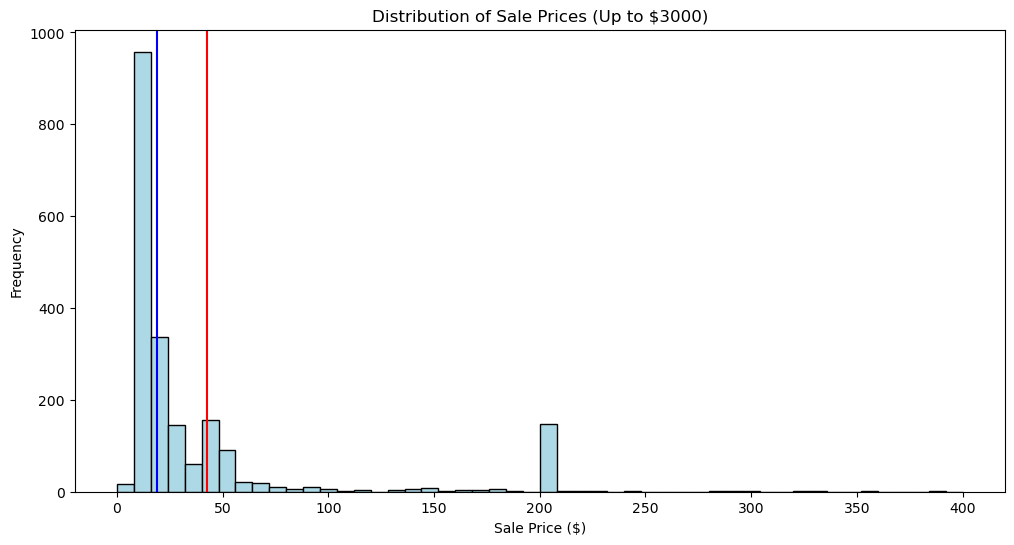

In [225]:
## ------------------- Sale price Analysis
# Convert 'Sale Price' column to numeric
df['Sale Price'] = pd.to_numeric(df['Sale Price'], errors='coerce')

# Calculate the mean and median
SP_mean_price = df['Sale Price'].mean()
SP_median_price = df['Sale Price'].median()

print('Average number of product Sale Price: ', SP_mean_price)
print('Median number of product Sale Price: ', SP_median_price)
## ------------------- Sale Price Visualization

# Creating a histogram to show the distribution of 'Total reviews' for different sale prices
plt.figure(figsize=(12, 6))
plt.hist(df['Sale Price'], bins=50, color='lightblue', edgecolor='black')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.axvline(SP_mean_price, color='r', label=f'Mean: {SP_mean_price:.2f}')
plt.axvline(SP_median_price, color='b', label=f'Median: {SP_median_price:.2f}')
plt.show()

## ------------------ Total Reviews Distribution (Up to 20,000 Reviews)
plt.figure(figsize=(12, 6))
plt.hist(df['Sale Price'], bins=50, range=(0, 400), color='lightblue', edgecolor='black')
plt.title('Distribution of Sale Prices (Up to $3000)')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.axvline(SP_mean_price, color='r', label=f'Mean: {SP_mean_price:.2f}')
plt.axvline(SP_median_price, color='b', label=f'Median: {SP_median_price:.2f}')
plt.show()

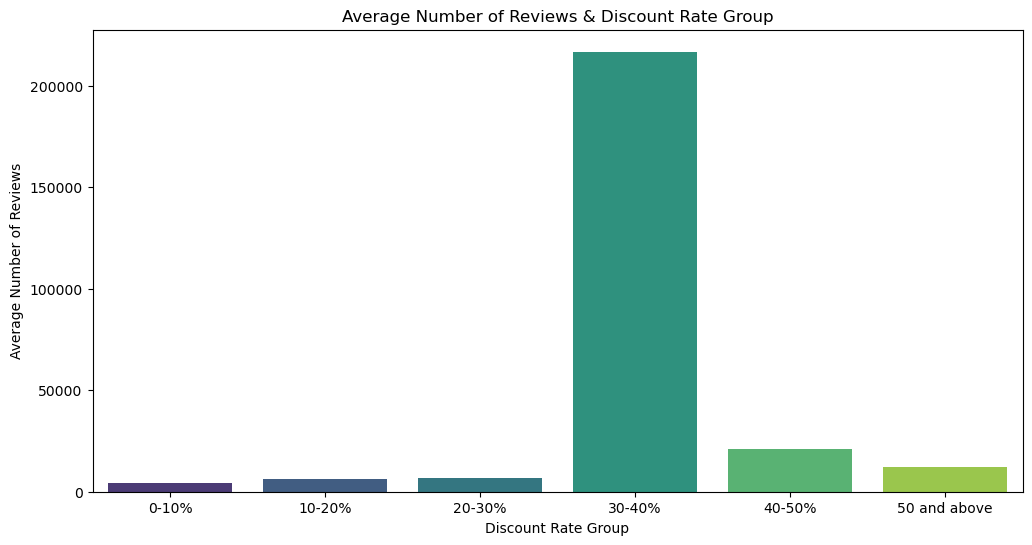

In [226]:
# Extracting numerical discount values from the 'Discount' column
def extract_discount_rate(discount_str):
    if 'off' in discount_str:
        return float(discount_str.strip('()% off'))
    return 0.0

# Convert the 'Discount' column to numerical values
df['Discount Rate'] = df['Discount'].apply(extract_discount_rate)

# Adjusting the discount rate categorization to show in 10% increments and group all above 60% as '60% and above'
df['Discount Rate Group'] = pd.cut(df['Discount Rate'], bins=[0, 10, 20, 30, 40, 50, 100], right=False, labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50 and above'])
discount_group = df.groupby('Discount Rate Group')['Total reviews'].mean().reset_index()

# Plotting the average number of reviews per discount rate group
plt.figure(figsize=(12, 6))
sns.barplot(x='Discount Rate Group', y='Total reviews', data=discount_group, palette='viridis')
plt.title('Average Number of Reviews & Discount Rate Group')
plt.xlabel('Discount Rate Group')
plt.ylabel('Average Number of Reviews')
plt.show()

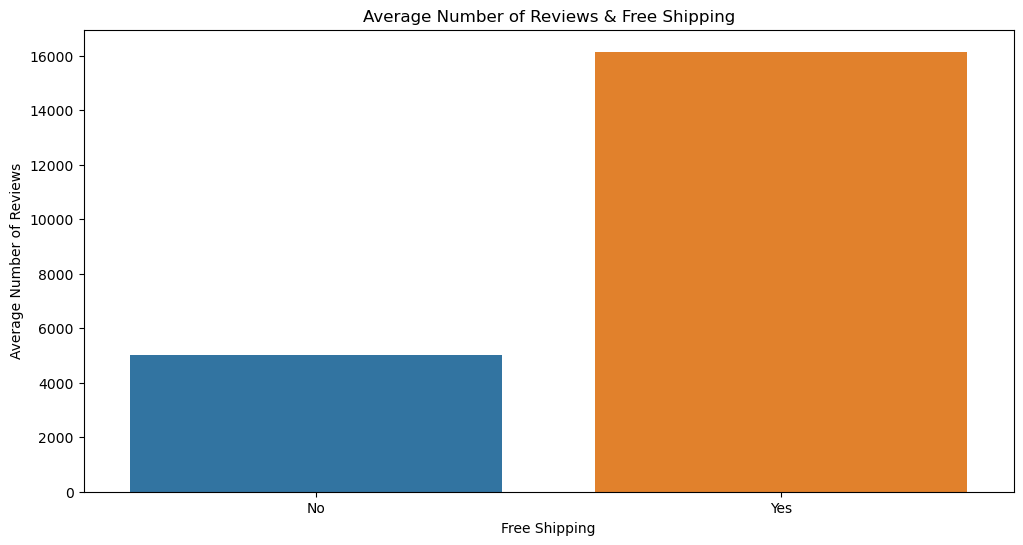

In [227]:
# Convert 'Free Shipping' to a boolean value for easier analysis
df['Free Shipping'] = df['Free Shipping'].apply(lambda x: x == 'O')

# Group by 'Free Shipping' and calculate mean of 'Total reviews'
freeShipping = df.groupby('Free Shipping')['Total reviews'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=freeShipping.index, y=freeShipping.values)
plt.title('Average Number of Reviews & Free Shipping')
plt.xlabel('Free Shipping')
plt.ylabel('Average Number of Reviews')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()
